In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/

 1730233408150.jpg
'500 rupees'
 affidavit
 ayz.docx
'Brown Blue Simple Professional CV  Graphic Designer Resume_20251014_152140_0000.png'
 brute.pdf
'Ch1 Introduction (1).pptx'
'Ch1 Introduction.pptx'
 Classroom
 cnic
'cnic (1)'
'cnic (2)'
'cnic (3)'
'Colab Notebooks'
'Communication technologies available in Pakistan.docx'
'comp assig 1.vsdx'
 data.csv
'DPP SIR AMIR ONLINE CLASS RECORDINGS'
'DS 02.gdoc'
'DS 04 (1).gdoc'
'DS 04.gdoc'
'DS 08 (1).gdoc'
'DS 08.gdoc'
'Functional English-1 - 26 Oct 23.gdoc'
'Functional English-1 - 26 Oct 23.pdf'
'Functional English-1.docx'
 heart.csv
'Hotel Management System.docx'
'How to Set Up Email on Mozilla Thunderbird.pdf'
'IMG-20251015-WA0061 (1).jpg'
 IMG-20251015-WA0061.jpg
'IMG-20251219-WA0113 (1).jpg'
'IMG-20251219-WA0113 (2).jpg'
'IMG-20251219-WA0113 (3).jpg'
'IMG-20251219-WA0113 (4).jpg'
 IMG-20251219-WA0113.jpg
 Internship
'internship form'
'LinkedIn Posts - iBixare.gsheet'
'make spreadsheet.gsheet'
'Ooop 11.docx'
'payment DEN'
'pf 11.docx'
 p

In [5]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [6]:
df.info()
df.describe()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


target
1    165
0    138
Name: count, dtype: int64

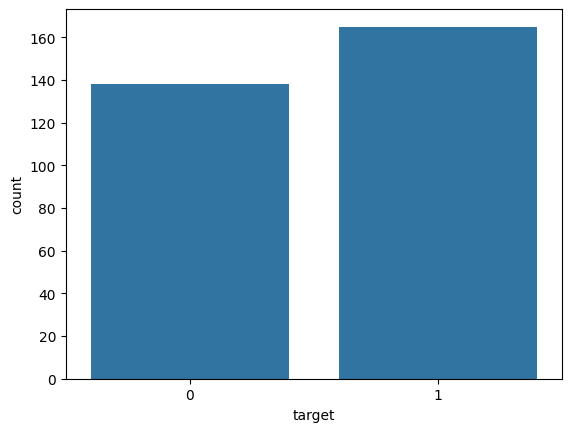

In [7]:
sns.countplot(x='target', data=df)
plt.show()

In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8688524590163934
ROC AUC: 0.8685344827586206


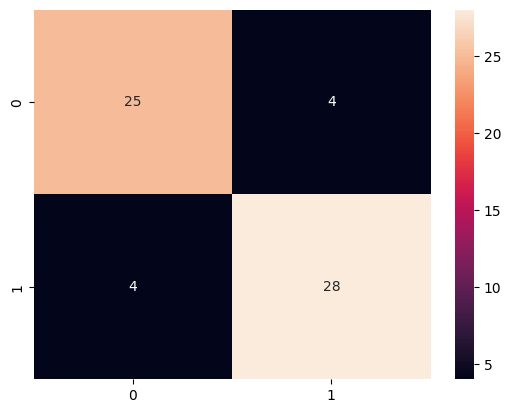

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

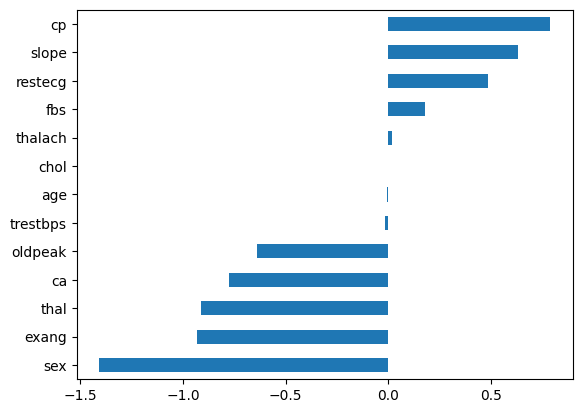

In [13]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.show()